In [ ]:
# -*- coding: utf-8 -*-
#Importing necessary libraries

import pandas as pd 
from scipy.stats import f_oneway, kruskal
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Cleaned Datasets

In [3]:
# Load cleaned data
benin = pd.read_csv('../data/benin-malanville_clean.csv', parse_dates=['Timestamp'])
sierra = pd.read_csv('../data/sierraleone-bumbuna_clean.csv', parse_dates=['Timestamp'])
togo = pd.read_csv('../data/togo-dapaong_qc_clean.csv', parse_dates=['Timestamp'])

# Label each country
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine
df_all = pd.concat([benin, sierra, togo], ignore_index=True)

# 2. Boxplots for GHI, DNI, DHI per Country

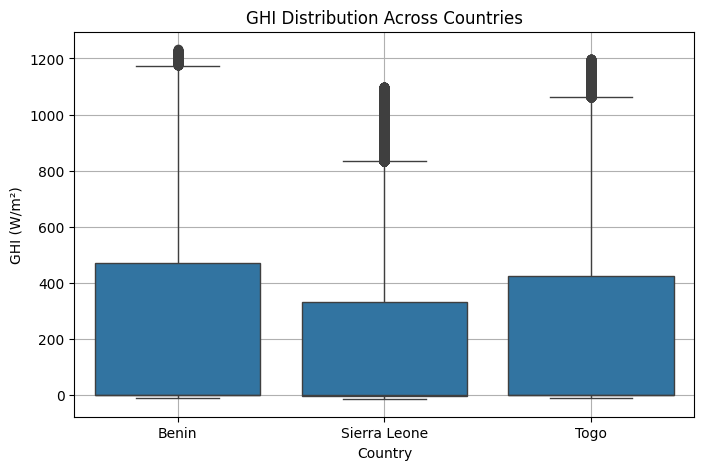

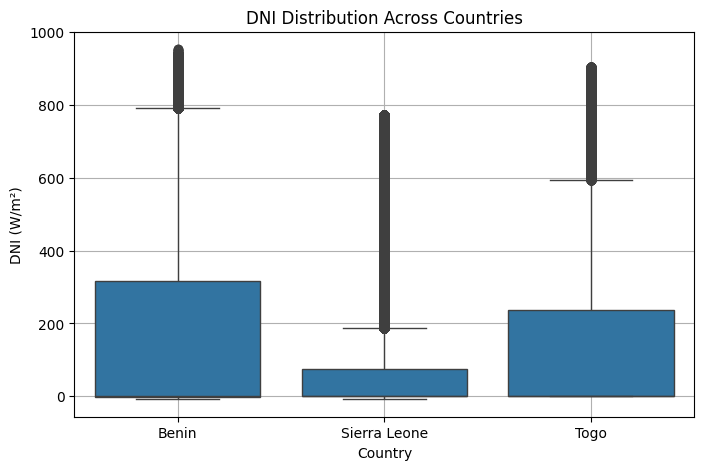

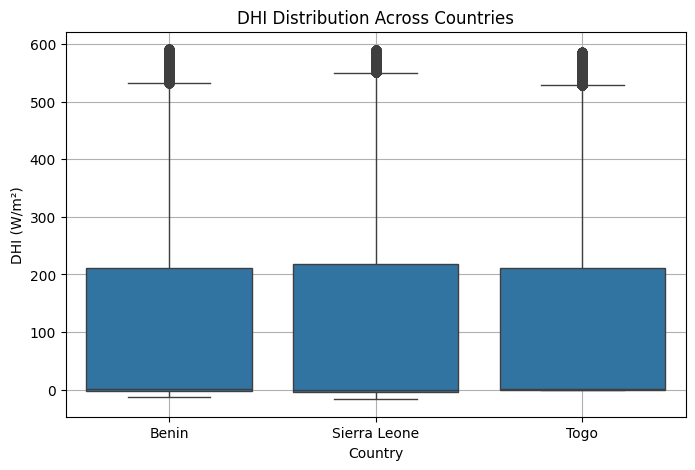

In [5]:
# Generate boxplots for GHI, DNI, and DHI metrics to visualize their distribution across countries
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Distribution Across Countries')
    plt.ylabel(f'{metric} (W/m²)')
    plt.grid(True)
    plt.show()

# 3. Summary Table: Mean, Median, Std Dev

In [6]:
#Summary statistics
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          151.57

# 4. Statistical Comparison

In [8]:
# ANOVA
anova_result = f_oneway(benin['GHI'], sierra['GHI'], togo['GHI'])
print("ANOVA p-value for GHI:", round(anova_result.pvalue, 5))

# Kruskal-Wallis test (non-parametric)
kruskal_result = kruskal(benin['GHI'], sierra['GHI'], togo['GHI'])
print("Kruskal-Wallis p-value for GHI:", round(kruskal_result.pvalue, 5))

ANOVA p-value for GHI: 0.0
Kruskal-Wallis p-value for GHI: 0.0


# 5. Bonus: Bar Chart Ranking by Average GHI

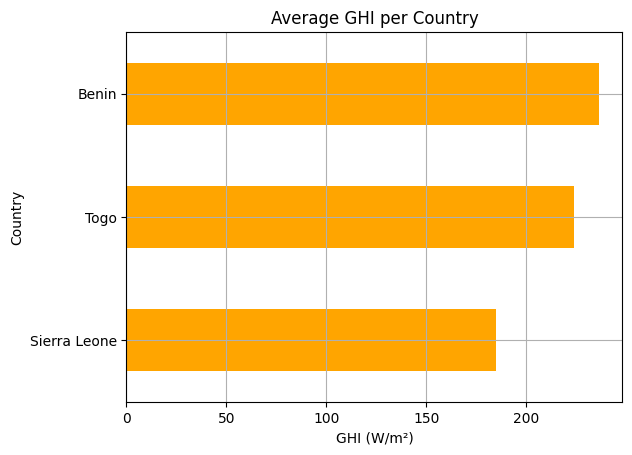

In [9]:
#Visualizing the average GHI per country
df_all.groupby('Country')['GHI'].mean().sort_values().plot(kind='barh', color='orange')
plt.title('Average GHI per Country')
plt.xlabel('GHI (W/m²)')
plt.grid(True)
plt.show()

# 6. Key Insights (Markdown Cell)

- **Benin** shows the highest average and median GHI, but also the **greatest variability**, making it the strongest but most fluctuating solar resource.
- **Sierra Leone** consistently has the **lowest GHI and DNI values**, indicating the weakest direct solar potential, likely due to cloudier or humid conditions.
- **Togo** offers a more **stable and balanced irradiance profile**, with moderate GHI and lower standard deviation, making it suitable for reliable solar harvesting.